In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Veri setini yükleyin
max_features = 20000  # Kullanılacak en sık kelime sayısı
max_len = 500  # Her inceleme için maksimum uzunluk

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)



x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")


17464789/17464789 [==============================] - 0s 0us/step
Training data shape: (25000, 500)
Testing data shape: (25000, 500)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Çift yönlü LSTM
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          2560000   
                                                                 
 bidirectional (Bidirection  (None, 500, 128)          98816     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 500, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                        

In [3]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/20
313/313 [==============================] - 60s 166ms/step - loss: 0.4057 - accuracy: 0.8094 - val_loss: 0.3392 - val_accuracy: 0.8558
Epoch 2/20
  1/313 [..............................] - ETA: 14s - loss: 0.1822 - accuracy: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 33s 104ms/step - loss: 0.1884 - accuracy: 0.9333 - val_loss: 0.3151 - val_accuracy: 0.8736
Epoch 3/20
313/313 [==============================] - 26s 83ms/step - loss: 0.1207 - accuracy: 0.9592 - val_loss: 0.3643 - val_accuracy: 0.8616
Epoch 4/20
313/313 [==============================] - 26s 81ms/step - loss: 0.0911 - accuracy: 0.9693 - val_loss: 0.5055 - val_accuracy: 0.8718
Epoch 5/20
313/313 [==============================] - 22s 71ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.5158 - val_accuracy: 0.8704


In [4]:
# Modeli test edin
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")


782/782 [==============================] - 19s 24ms/step - loss: 0.3329 - accuracy: 0.8677
Test Accuracy: 0.867680013179779


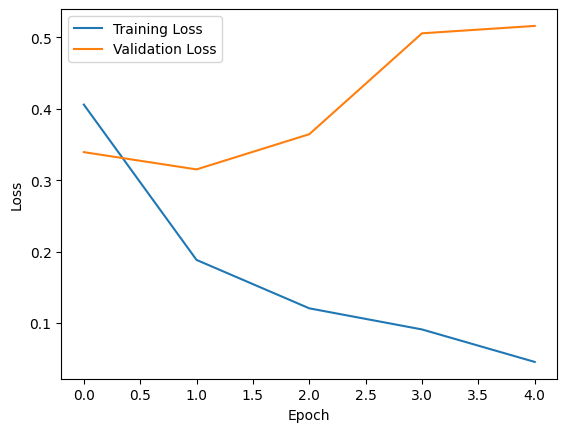

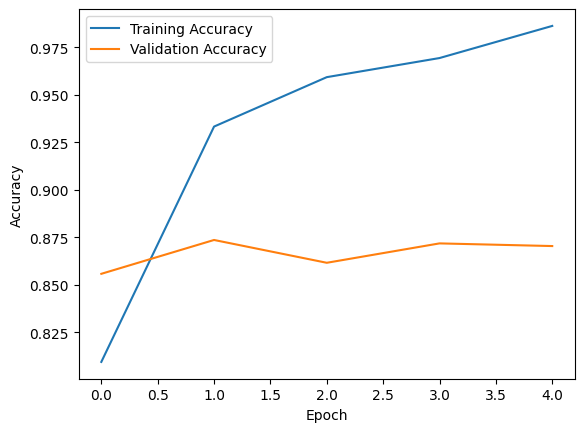

In [5]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kayıplarını çizin
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluklarını çizin
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [13]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

word_index = imdb.get_word_index()

user_sentence = "I love this movie, it is fantastic"

user_sentence_tokens = user_sentence.lower().split()

user_sentence_indices = [word_index.get(word, 0) for word in user_sentence_tokens]

print("Indexed user sentence:", user_sentence_indices)

1641221/1641221 [==============================] - 0s 0us/step
Indexed user sentence: [10, 116, 11, 0, 9, 6, 774]


In [14]:
# Cümleyi pad etme
padded_user_sentence = pad_sequences([user_sentence_indices], maxlen=max_len)

print("Padded user sentence:", padded_user_sentence)


Padded user sentence: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   

In [15]:
# Eğitilmiş modeli yükleyin (eğer model kaydedildiyse)
# from tensorflow.keras.models import load_model
# model = load_model('best_model.h5')

# Modelle tahmin yapma
prediction = model.predict(padded_user_sentence)

# Tahmin sonucunu yazdırma
print("Prediction (Probability):", prediction)
print("Sentiment:", "Positive" if prediction >= 0.5 else "Negative")


1/1 [==============================] - 1s 1s/step
Prediction (Probability): [[0.5716397]]
Sentiment: Positive


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional

# Modeli oluşturun
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))  # Rastgele başlatılan embedding matrisi
model.add(Bidirectional(GRU(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(GRU(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 128)          2560000   
                                                                 
 bidirectional_3 (Bidirecti  (None, 500, 128)          74496     
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 500, 128)          0         
                                                                 
 gru_5 (GRU)                 (None, 64)                37248     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                      

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Erken durdurma ve model kontrol callback'lerini oluşturun
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_gru_model.h5', save_best_only=True, monitor='val_loss')

# Modeli eğitin
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/20
313/313 [==============================] - 83s 133ms/step - loss: 0.4404 - accuracy: 0.7840 - val_loss: 0.3176 - val_accuracy: 0.8652
Epoch 2/20
313/313 [==============================] - 33s 105ms/step - loss: 0.2022 - accuracy: 0.9252 - val_loss: 0.3105 - val_accuracy: 0.8828
Epoch 3/20
313/313 [==============================] - 28s 91ms/step - loss: 0.1099 - accuracy: 0.9632 - val_loss: 0.3654 - val_accuracy: 0.8758
Epoch 4/20
313/313 [==============================] - 22s 71ms/step - loss: 0.0773 - accuracy: 0.9747 - val_loss: 0.4081 - val_accuracy: 0.8520
Epoch 5/20
313/313 [==============================] - 22s 69ms/step - loss: 0.0757 - accuracy: 0.9736 - val_loss: 0.5021 - val_accuracy: 0.8670


In [23]:
# Modeli test edin
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

782/782 [==============================] - 17s 22ms/step - loss: 0.3313 - accuracy: 0.8716
Test Accuracy: 0.8715599775314331
